<a href="https://colab.research.google.com/github/SudhakarAnemu/AI-DS-ML-DL/blob/master/DL_TensroFlow_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("js")

js


# Importing all required Libraries

In [2]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [3]:
!pip install tensorflow
!pip install scikit-learn
!pip install tensorflow-datasets

In [0]:
import tensorflow as tf

In [5]:
print("Version of the Tenserflow : ", tf.__version__)

Version of the Tenserflow :  2.1.0-rc1


##Section 4

### Example 1

Import all relevant libraries

In [6]:
import numpy as np # mathematical operations
import matplotlib.pyplot as plt # nice graphs
from mpl_toolkits.mplot3d import Axes3D # nice 3D graphs
print("Import done")

Import done


Generate random input data to train on.
<br>we are about to create a two variable linear model :<br>f(x,z) = a*x +b*z +c
<br>From the linear model: inputs = n * k = 1000*2
<br>

In [7]:
observations = 1000
xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))
inputs = np.column_stack((xs, zs)) # define like a matrix
print("shape of the inputs(its like Matrix) : ", inputs.shape)

shape of the inputs(its like Matrix) :  (1000, 2)


Create the targets we will aim at
<br> targets = f(x,z) = 2*x - 3*z + 5 + noise
<br> here 2,3 are weights and 5 is the bias
<br> noise will always be there in the real data. 


In [8]:
noise = np.random.uniform(-1,1,(observations,1))
targets = 2*xs - 3*zs + 5 + noise
print("shape of the targets : ", targets.shape)
# print("Sample data : ", targets

shape of the targets :  (1000, 1)


In [9]:
print(targets.any)

<built-in method any of numpy.ndarray object at 0x7eff41eeacb0>


Plot the training data
<br>The point is to see that there is a strong trend that out model should learn to reproduce
<br>

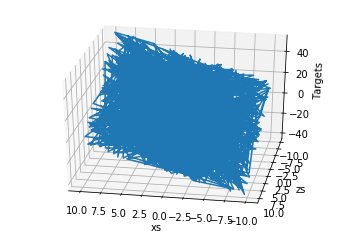

In [10]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

Initialize variables
<br>Our initial weights and biases will be picked randomly from the interval [-0.1,0.1]
<br>weights : matrix, biases : scaler
<br>

In [11]:
init_range = 0.1
weights = np.random.uniform(-init_range, init_range, size=(2,1))
print("Weights : ", weights)
biases = np.random.uniform(-init_range, init_range, size=1)
print("Biases : ", biases)

Weights :  [[ 0.09201219]
 [-0.08124396]]
Biases :  [0.04632829]


Set a learning rate(eta)
<br>

In [0]:
learning_rate = 0.02 #we can play with different learning rates

Train the model
<br>Procedure will be repeated.
<br>Game plan for each iteration
<br>1. calculate outputs
<br>2. compare outputs to targets through the loss
<br>3. print the loss
<br>4. Adjust weights and biases
<br>

In [13]:
for i in range(5000):
  outputs = np.dot(inputs, weights) + biases # y = mx + c - 1000*1 1000*2  2*1  scalar
  deltas = outputs - targets # deltas represents the diff between outputs and input targets
  loss = np.sum(deltas ** 2) / 2 / observations
  print("losss : ", loss)
  deltas_scaled = deltas / observations
  weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
  biases = biases - learning_rate * np.sum(deltas_scaled)

losss :  210.36306170499196
losss :  33.61630461708643
losss :  13.891133924292017
losss :  11.323795881816867
losss :  10.658662013559347
losss :  10.219504166836398
losss :  9.820060668238606
losss :  9.438924157460594
losss :  9.07312643842936
losss :  8.721804416664993
losss :  8.384356622815773
losss :  8.06023175929602
losss :  7.748903410831533
losss :  7.449866318757091
losss :  7.162635217583744
losss :  6.886744005756649
losss :  6.621744984129035
losss :  6.367208128815394
losss :  6.122720393292925
losss :  5.887885038124782
losss :  5.662320987154679
losss :  5.445662209120117
losss :  5.237557123679646
losss :  5.037668030890263
losss :  4.845670563209006
losss :  4.661253159129548
losss :  4.484116557599641
losss :  4.313973312398955
losss :  4.150547325689301
losss :  3.9935733999802734
losss :  3.8427968077833454
losss :  3.69797287825597
losss :  3.558866600165032
losss :  3.4252522405252783
losss :  3.296912978293915
losss :  3.17364055252696
losss :  3.0552349244263

Print weight and biases and see if we have worked correctionly 
<br> Play around with the code for homework.
<br>1. number of observations
<br>2. leanring rate
<br>3. Number of iterations
<br>4. initial range for initializing weights and biases

In [14]:
print("weight : ", weights, " biases : ", biases)


weight :  [[ 2.00103667]
 [-2.9994687 ]]  biases :  [4.97655486]


Plot last output vs target

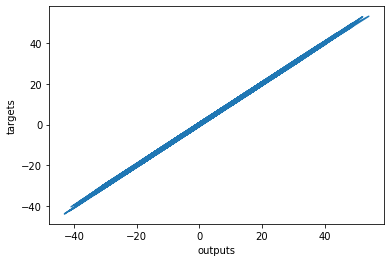

In [15]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

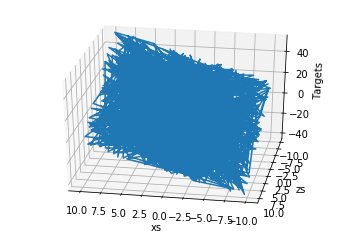

In [16]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

## Section 5

Same ex with TF
Minimal ex with TF
<br> Import the relevanth libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print("Import done")

Import done


Data generation

In [0]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


Solving with TensorFlow

In [0]:
training_data = np.load('TF_intro.npz')

In [20]:
# input_size = 2
# output_size = 1

# model = tf.keras.Sequential([
#                              tf.keras.layers.Dense(output_size)
# ])

# model.compile(optimizer = 'sgd', loss='mean_squared_error')

# model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=0)

##### the only diff is that verbose=0 / 2

input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)
                            ])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 2s - loss: 32.6693
Epoch 2/100
1000/1000 - 0s - loss: 4.3721
Epoch 3/100
1000/1000 - 0s - loss: 1.4286
Epoch 4/100
1000/1000 - 0s - loss: 0.6410
Epoch 5/100
1000/1000 - 0s - loss: 0.4274
Epoch 6/100
1000/1000 - 0s - loss: 0.3688
Epoch 7/100
1000/1000 - 0s - loss: 0.3548
Epoch 8/100
1000/1000 - 0s - loss: 0.3486
Epoch 9/100
1000/1000 - 0s - loss: 0.3429
Epoch 10/100
1000/1000 - 0s - loss: 0.3497
Epoch 11/100
1000/1000 - 0s - loss: 0.3504
Epoch 12/100
1000/1000 - 0s - loss: 0.3514
Epoch 13/100
1000/1000 - 0s - loss: 0.3492
Epoch 14/100
1000/1000 - 0s - loss: 0.3527
Epoch 15/100
1000/1000 - 0s - loss: 0.3463
Epoch 16/100
1000/1000 - 0s - loss: 0.3505
Epoch 17/100
1000/1000 - 0s - loss: 0.3519
Epoch 18/100
1000/1000 - 0s - loss: 0.3463
Epoch 19/100
1000/1000 - 0s - loss: 0.3504
Epoch 20/100
1000/1000 - 0s - loss: 0.3501
Epoch 21/100
1000/1000 - 0s - loss: 0.3430
Epoch 22/100
1000/1000 - 0s - loss: 0.3553
Epoch 23/100
1000/1000 - 0s - loss: 0.34

In [21]:
model.layers[0].get_weights()

[array([[ 2.00534 ],
        [-2.983244]], dtype=float32), array([4.968803], dtype=float32)]

In [22]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.00534 ],
       [-2.983244]], dtype=float32)

In [23]:
bias = model.layers[0].get_weights()[1]
bias

array([4.968803], dtype=float32)

Extract the outputs (make predictions)

In [24]:
# model.predict_on_batch(training_data['inputs']).round(1)
model.predict_on_batch(training_data['inputs'])


<tf.Tensor: shape=(1000, 1), dtype=float32, numpy=
array([[-1.80327377e+01],
       [ 2.46499023e+01],
       [-8.82604027e+00],
       [ 1.40726242e+01],
       [ 5.00863571e+01],
       [ 1.82142429e+01],
       [-1.96521530e+01],
       [ 2.65557842e+01],
       [ 2.67914925e+01],
       [-9.87908363e+00],
       [-1.29125500e+01],
       [-3.81054688e+01],
       [ 1.15888290e+01],
       [ 1.47292156e+01],
       [ 1.89860134e+01],
       [ 8.04028702e+00],
       [ 1.69745770e+01],
       [-1.22202816e+01],
       [-6.90151262e+00],
       [ 2.14132843e+01],
       [-3.60987091e+01],
       [ 1.01634731e+01],
       [ 1.78756752e+01],
       [ 2.60034332e+01],
       [-8.86072350e+00],
       [-8.40715408e+00],
       [-2.14535475e+00],
       [-3.92010574e+01],
       [ 1.82098866e+01],
       [-3.46669617e+01],
       [-3.27727432e+01],
       [-8.26020813e+00],
       [ 9.83278942e+00],
       [-8.06475449e+00],
       [ 3.89349251e+01],
       [ 3.95806007e+01],
       [ 3.84

In [25]:
training_data['targets'].round(1)

array([[-18. ],
       [ 24.4],
       [ -9.3],
       [ 13. ],
       [ 50.2],
       [ 18.2],
       [-20.2],
       [ 27.1],
       [ 26.2],
       [-10.1],
       [-12.3],
       [-37.3],
       [ 11.3],
       [ 14.2],
       [ 18.6],
       [  8.1],
       [ 17.7],
       [-11.4],
       [ -7.5],
       [ 21. ],
       [-36.9],
       [  9.4],
       [ 17.4],
       [ 26.9],
       [ -9.6],
       [ -8.2],
       [ -2.3],
       [-38.9],
       [ 18.9],
       [-34.7],
       [-32.6],
       [ -7.3],
       [ 10.3],
       [ -7.3],
       [ 39.4],
       [ 40.2],
       [ 38.3],
       [ 13.4],
       [-22.5],
       [-26.7],
       [ 41.8],
       [ 11.7],
       [ 23.5],
       [ 47.9],
       [-33.8],
       [ 10.5],
       [ 14.1],
       [-23.4],
       [ 24.3],
       [-11. ],
       [ -0.2],
       [ 19.1],
       [-29.7],
       [ 13.5],
       [ 27.6],
       [ 14.2],
       [-33.1],
       [-13.5],
       [ 13.7],
       [ 20.1],
       [  3.5],
       [ 37.2],
       [

Plotting the data

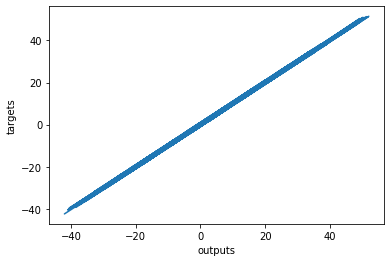

In [26]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

## Section 12 - The MNIST example

Import the relavent packages

In [27]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
print("Import done")

Import done


Data

In [28]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)
# Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/1.0.0. Subsequent calls will reuse this data.

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/1.0.0. Subsequent calls will reuse this data.


Training, Test and Validation datasets

In [29]:
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']

num_validation_samples = 0.1*mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)

num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

# Transforming the values
def scale(image, label):
  image = tf.cast(image, tf.float32)
  image /= 255.
  return image, label

# scale whole train data and store it in a variable
scaled_train_and_validation_data = mnist_train.map(scale)

# scale whole test data 
test_data = mnist_test.map(scale)

BUFFER_SIZE = 10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)
validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE = 100
train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))
# validation_inputs, validation_targets = next(iter(validation_data))

print("done")


done


Model - Outline the model

In [30]:
input_size = 784
output_size = 10
hidden_layer_size = 50

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28,28,1)),
                             tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                             tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                             tf.keras.layers.Dense(output_size,activation='softmax')
])

print("done")

done
